# EDA King County Housing: Data Cleaning and Feature Engineering

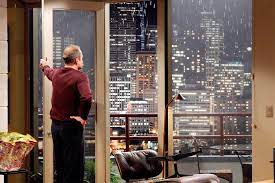

In [108]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime, date, time, timedelta


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [109]:
# import raw data
df_kc_housing_raw = pd.read_csv('data/King_County_House_prices_dataset.csv')

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1) 

## Data Overview

In [110]:
# first overview of data
df_kc_housing_raw.shape


(21597, 21)

In [111]:
df_kc_housing_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [112]:
df_kc_housing_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [113]:
df_kc_housing_raw.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,3,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,3,7,1020,0.0,2008,0.000,98144,47.594,-122.299,1020,1357


In [114]:
df_kc_housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [115]:
df_kc_housing_raw.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4580474287.771,NaN,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,NaN,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,NaN,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,NaN,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,NaN,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,NaN,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,NaN,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,NaN,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,NaN,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,NaN,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,NaN,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,NaN,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000


## Stakeholder and Task Description

- Stakeholder wants to buy real estate for his family
- He has five children and very limited budget
- Looking to buy in a nice, social neighborhood
- Needs suggestions on timing (season, month) an location

## Cleaning and additional features

- check duplicates
- check and convert data formats in columns
- engineer new features where necessary
- check for missing values
- drop columns not used in further analyses
- save clean data set

In [116]:
# deep copy of the df to be cleaned and processed df:
df_kc_housing = df_kc_housing_raw.copy(deep=True)

#### Duplicates

In [117]:
# check for duplicates

df_kc_housing.duplicated().value_counts()

# the data set holds no duplicates

False    21597
dtype: int64

### Data Types

In [118]:
# check data types for entries to clean numeric data in columns
df_kc_housing.dtypes

# date and sqft_basement need to be converted to numeric data types

id               int64  
date             object 
price            float64
bedrooms         int64  
bathrooms        float64
sqft_living      int64  
sqft_lot         int64  
floors           float64
waterfront       float64
view             float64
condition        int64  
grade            int64  
sqft_above       int64  
sqft_basement    object 
yr_built         int64  
yr_renovated     float64
zipcode          int64  
lat              float64
long             float64
sqft_living15    int64  
sqft_lot15       int64  
dtype: object

In [119]:
# check date type for first entry in column 'date' 
type(df_kc_housing['date'][0])

# convert string to timestamp format
df_kc_housing['date'] = pd.to_datetime(df_kc_housing['date'], format='%m/%d/%Y')

# check data type to control
type(df_kc_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [120]:
df_kc_housing.date.min()

Timestamp('2014-05-02 00:00:00')

In [121]:
df_kc_housing.date.max()

Timestamp('2015-05-27 00:00:00')

In [122]:
# cleaning column sqft_basement 

# first attempt to convert column entries to float
df_kc_housing = df_kc_housing.astype({'sqft_basement': float})

ValueError: could not convert string to float: '?'

In [123]:
# find '?'-character in sqft_basement column
df_kc_housing.query('sqft_basement == "?"')

#replace the `?`-character with a numpy NaN value
df_kc_housing['sqft_basement'] = df_kc_housing.sqft_basement.replace('?',np.NaN)
# change data type to float

df_kc_housing = df_kc_housing.astype({'sqft_basement': float})

df_kc_housing.sqft_basement.dtypes

dtype('float64')

### Feature Engineering 

#### Month sold

In [124]:
# create a column with month of property selling
df_kc_housing['month_sold'] = pd.to_datetime(df_kc_housing['date']).dt.month

In [125]:
df_kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#### Square feet to square meter

In [126]:
# convert square feet to square meter in column square feet living:
df_kc_housing['sqft_living'] = df_kc_housing.sqft_living.apply(lambda x: x/10.764)

df_kc_housing = df_kc_housing.astype({'sqft_living': int})

df_kc_housing = df_kc_housing.rename({'sqft_living':'sqm_living'},axis=1)


In [127]:
# convert square feet to square meter in column square feet lot:

df_kc_housing['sqft_lot'] = df_kc_housing.sqft_lot.apply(lambda x: x/10.764)

df_kc_housing = df_kc_housing.astype({'sqft_lot': int})

df_kc_housing = df_kc_housing.rename({'sqft_lot':'sqm_lot'},axis=1)

In [128]:
df_kc_housing.head()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
0,7129300520,2014-10-13,221900.000,3,1.000,109,524,1.000,NaN,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.000,3,2.250,238,672,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.000,2,1.000,71,929,1.000,0.000,0.000,3,6,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.000,4,3.000,182,464,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.000,3,2.000,156,750,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503,2


#### Likert-Scale building condition

In [129]:
# creating a 5-point-likert-scale of 'grade' to match the scale of 'condition' 
df_kc_housing['grade'] = df_kc_housing['grade'].map({
    3:1,
    4:1, 
    5:2,
    6:2,
    7:3,
    8:3,  
    9:3,
    10:4,
    11:4,
    12:5, 
    13:5
    })

# rename column 'grade' to 'construction'
df_kc_housing = df_kc_housing.rename({'grade':'construction'},axis=1)
# check results
df_kc_housing.construction.unique()

array([3, 2, 4, 5, 1])

#### Dummy 'social neighborhood'

My stakeholder has five kids and is looking to buy in a nice, social neighborhood. 

To assess this criteria I am creating a dummy variable 'social_ngh' that holds the most family friendly districts (A-rating) in the central area of King County (Seattle and suburb Bellevue). 

Information on the most family friendly neighborhood was taken from 
https://www.niche.com/about/methodology/best-places-for-families/

The score includes public schools, rate of higher education in the population, cost of living, crime rates, family amenities, diversity, percent of household with children, percent of children below poverty, residents 17 years old an under - based on the US Census.

In [130]:
df_kc_housing.zipcode.nunique()

70

In [131]:
# bins (zip-code ranges), family friendly zip codes = 1
bins = [98001, 98003, 98010, 98013, 98015, 98106, 98112, 98116, 98125, 98141, 98144, 98194, 98195, 98198, 98199]
# dummy-labeling
labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

df_kc_housing['social_ngh'] = pd.cut(
    df_kc_housing.zipcode,
    bins = bins,
    labels=labels,
    ordered=False,
    include_lowest=True
)

### Missing Values

<AxesSubplot:>

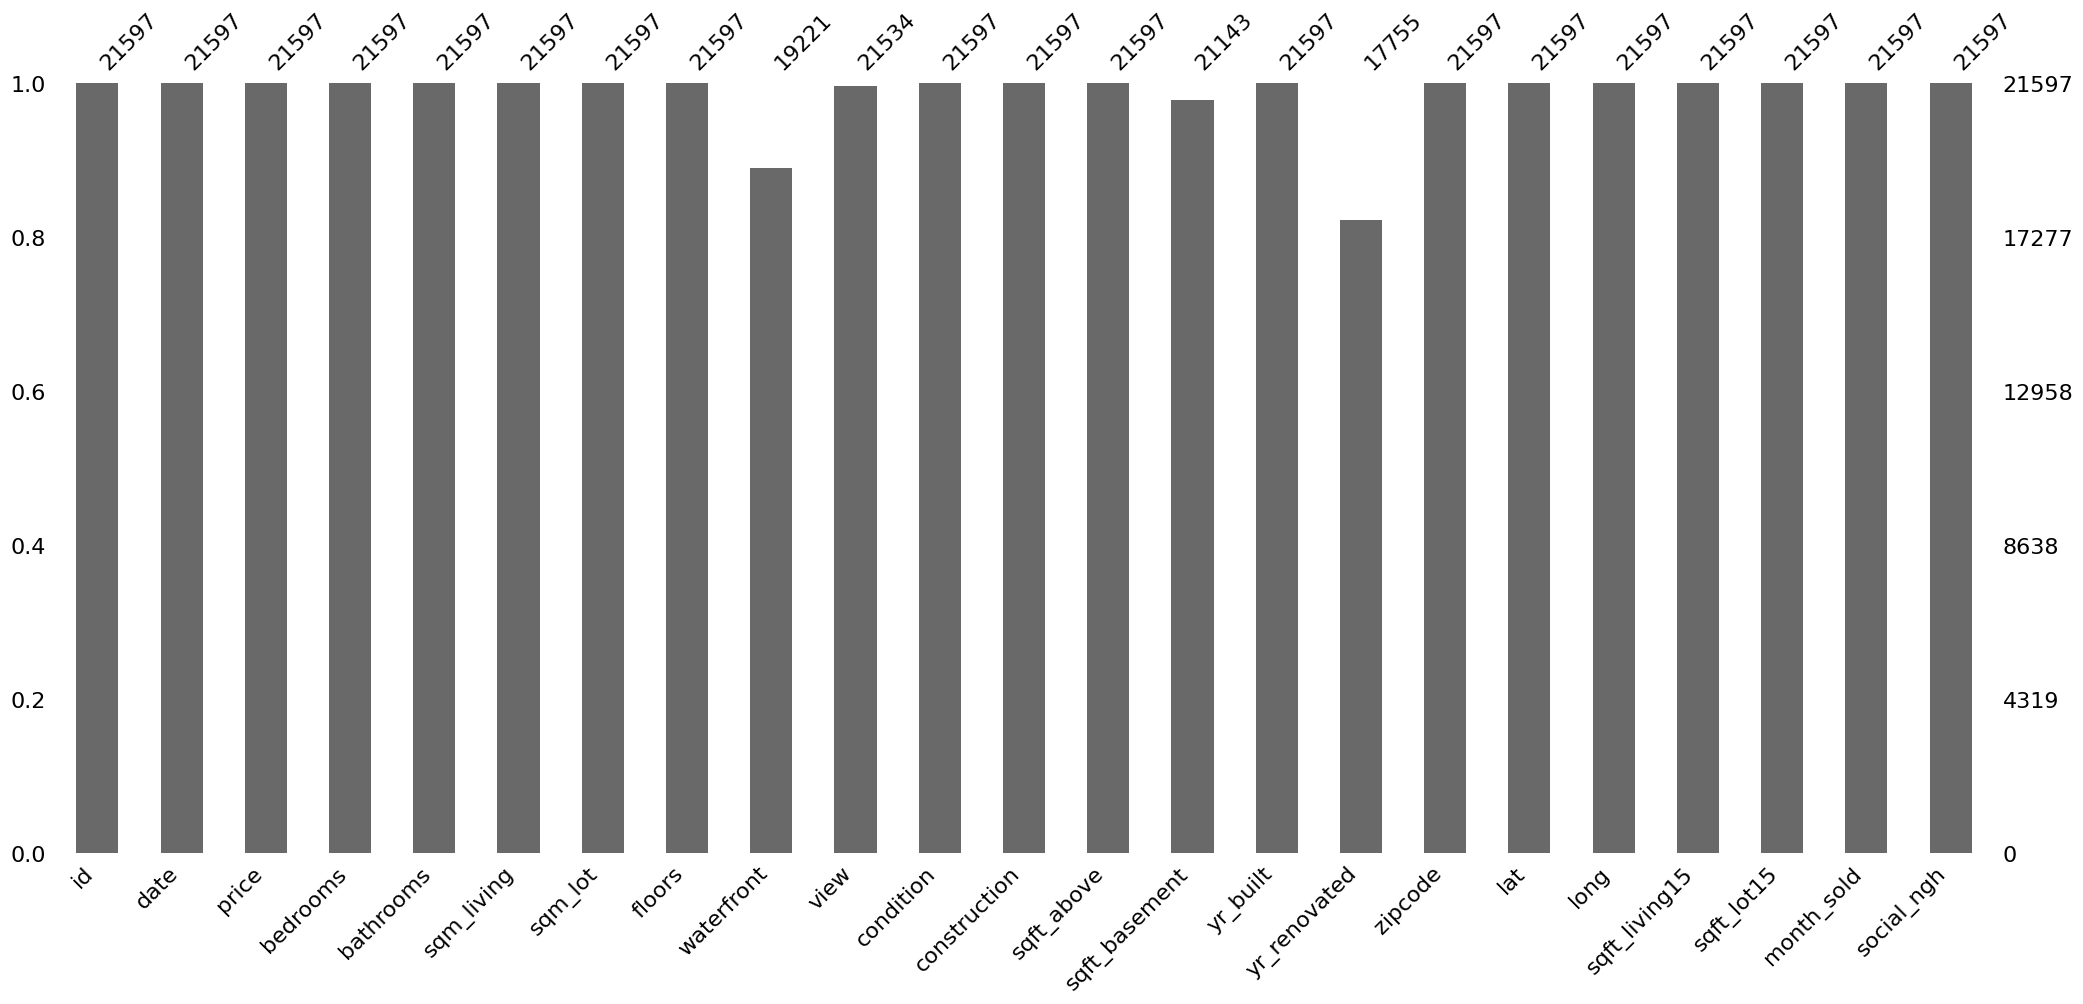

In [132]:
# missing values
# display number of missing values per column
df_kc_housing.isna().sum()

msno.bar(df_kc_housing)
# the column 'waterfront' has approx. 10 percent of missing values, the column 'yr_renovated' approx. 20 percent. 



In [133]:
# my stakeholder has very limited budget and it not interested in a property near the waterfront. In my case, it is best to drop the waterfront-column
# rather then to drop row-wise, as I might loose valuable information:

df_kc_housing = df_kc_housing.drop('waterfront', axis=1)

In [134]:
# yr_renovated column hold approx. 20% of missing values, so again I would lose a lot of information if I dropped row wise. 
# My stakeholder is not explicitly interested in the year of renovation, but rather in the overall condition of the property. 
# Instead of using yr_renovated, I will use the 'condition'-scale to assess the condition of the property, 
# and am therefore dropping yr_renovated as well:

df_kc_housing = df_kc_housing.drop('yr_renovated', axis=1)


In [135]:
# the data set does not contain missing values
df_kc_housing.isna().sum()



id               0  
date             0  
price            0  
bedrooms         0  
bathrooms        0  
sqm_living       0  
sqm_lot          0  
floors           0  
view             63 
condition        0  
construction     0  
sqft_above       0  
sqft_basement    454
yr_built         0  
zipcode          0  
lat              0  
long             0  
sqft_living15    0  
sqft_lot15       0  
month_sold       0  
social_ngh       0  
dtype: int64

In [136]:
# my client has a large family and very limited budget, he is interested in enough living space before the lot. 
# create price per square meter of living area

df_kc_housing['price_sqm_living'] = round(df_kc_housing.price/df_kc_housing.sqm_living, 0)

In [137]:
# and create another column with price per sqm including 25% of the lot as total living area:

df_kc_housing['sqm_total'] = round(df_kc_housing.sqm_living + (df_kc_housing.sqm_lot*0.25), 0)

df_kc_housing['price_sqm_total'] = round(df_kc_housing.price/df_kc_housing.sqm_total, 0)

### Outliers

In [138]:
# outliers
df_kc_housing.describe(include='all')
# possible outliers may be in the columns: bedrooms, bathrooms, sqm_lot

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,view,condition,construction,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,21597.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21534.000,21597.000,21597.000,21597.000,21143.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN
top,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16533.000,NaN,NaN,NaN
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4580474287.771,NaN,540296.574,3.373,2.116,192.766,1402.264,1.494,0.234,3.410,2.972,1788.597,291.852,1971.000,98077.952,47.560,-122.214,1986.620,12758.284,6.574,NaN,2852.541,543.329,1425.915
std,2876735715.748,NaN,367368.140,0.926,0.769,85.297,3847.330,0.540,0.766,0.651,0.447,827.760,442.498,29.375,53.513,0.139,0.141,685.230,27274.442,3.115,NaN,1189.167,980.231,830.881
min,1000102.000,NaN,78000.000,1.000,0.500,34.000,48.000,1.000,0.000,1.000,1.000,370.000,0.000,1900.000,98001.000,47.156,-122.519,399.000,651.000,1.000,NaN,945.000,73.000,7.000
25%,2123049175.000,NaN,322000.000,3.000,1.750,132.000,468.000,1.000,0.000,3.000,3.000,1190.000,0.000,1951.000,98033.000,47.471,-122.328,1490.000,5100.000,4.000,NaN,1969.000,281.000,816.000


In [139]:
# bedrooms:
df_kc_housing.bedrooms.sort_values().tail(30)

18960    7 
4756     7 
7184     7 
8620     7 
8507     7 
9723     7 
12872    8 
10946    8 
19287    8 
9443     8 
15656    8 
15056    8 
18462    8 
4063     8 
17221    8 
9068     8 
4031     8 
1658     8 
6168     8 
4092     9 
18428    9 
8537     9 
6073     9 
16830    9 
4231     9 
15147    10
13301    10
19239    10
8748     11
15856    33
Name: bedrooms, dtype: int64

In [140]:
df_kc_housing.iloc[15856]

id                  2402100895         
date                2014-06-25 00:00:00
price              640000.000          
bedrooms            33                 
bathrooms          1.750               
sqm_living          150                
sqm_lot             557                
floors             1.000               
view               0.000               
condition           5                  
construction        3                  
sqft_above          1040               
sqft_basement      580.000             
yr_built            1947               
zipcode             98103              
lat                47.688              
long               -122.331            
sqft_living15       1330               
sqft_lot15          4700               
month_sold          6                  
social_ngh          0                  
price_sqm_living   4267.000            
sqm_total          289.000             
price_sqm_total    2215.000            
Name: 15856, dtype: object

In [141]:
# 33 bedrooms with only 150 sqm of living are and 1.75 bathrooms seems implausible, likely an outlier
# delete the row
df_kc_housing.drop([15856], inplace=True)

# reset index
df_kc_housing.reset_index(inplace=True, drop=True)

In [142]:
# check column bathrooms for outliers:
df_kc_housing.bathrooms.sort_values().tail(30)

# eight bathrooms seems plausible and do not need to ne considered outliers

10362   5.500
3018    5.500
4145    5.500
7028    5.500
2624    5.500
20216   5.500
13894   5.500
3098    5.500
20435   5.500
18959   5.500
16758   5.750
6495    5.750
4407    5.750
15737   5.750
1313    6.000
21327   6.000
4031    6.000
19132   6.000
21033   6.000
12358   6.000
18287   6.250
14542   6.250
21489   6.500
20561   6.500
4020    6.750
8085    6.750
8537    7.500
9245    7.750
12764   8.000
7245    8.000
Name: bathrooms, dtype: float64

In [143]:
# check sqm_lot for outliers:
df_kc_housing.sqm_lot.sort_values().tail(30)

# such large lots are rare in the data set, but not unrealistic and do not need to be removed

18212    40468 
4383     40468 
13873    40468 
7243     40710 
14674    41196 
8436     42167 
16980    44434 
19075    45850 
9201     46411 
17334    46578 
20404    46821 
2962     46931 
12906    47104 
17561    49573 
17810    50382 
7287     53660 
16173    57950 
13464    59569 
12993    66489 
4536     78345 
9705     80936 
20435    80936 
7070     81907 
6685     85509 
4437     91255 
3945     91322 
7762     95138 
7640     99797 
17304    108212
1717     153414
Name: sqm_lot, dtype: int64

### Drop not used columns

In [144]:
#drop columns not used in further analyses, according to needs od stakeholder and analysis strategy

df_kc_housing = df_kc_housing.drop(['sqft_above','sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15'], axis = 1)


### Save clean data set

In [145]:
# save clean df as .csv

df_kc_housing.to_csv('data/king_county_house_clean_dataset.csv', index=False)